<a href="https://colab.research.google.com/github/Etriuus/Evaluacion2_parte2/blob/main/Daniel_Matias_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2



---



**Autor:**

**Daniel Valdebenito**

**Matias Cartes**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-13 01:19:00--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv.1’

dataset_churn_2025. 100%[===================>] 393.03K  1.86MB/s    in 0.2s    

2025-06-13 01:19:02 (1.86 MB/s) - ‘dataset_churn_2025.csv.1’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,mes_a_mes,1,0
1,69,57,182.60,4,1_ano,0,0
2,46,58,109.54,1,1_ano,1,0
3,32,35,125.52,4,mes_a_mes,1,1
4,60,24,199.34,4,mes_a_mes,1,1


In [ ]:
# Revisamos datos nulos y los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15000 non-null  int64  
 1   months_active  15000 non-null  int64  
 2   monthly_spend  15000 non-null  float64
 3   support_calls  15000 non-null  int64  
 4   contract_type  15000 non-null  object 
 5   has_discount   15000 non-null  int64  
 6   churn          15000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 820.4+ KB


In [ ]:
# Vemos la distrubucin de clases
data.groupby("churn").size()

,0
churn,
0,9988
1,5012


In [ ]:
# modificamos las columnas segun la variable objetivo
df = data

Obj = ['contract_type']

for feature in Obj:
    mean_encoded = df.groupby(feature)['churn'].mean()
    df[feature] = df[feature].map(mean_encoded)
df.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,0.543795,1,0
1,69,57,182.60,4,0.019603,0,0
2,46,58,109.54,1,0.019603,1,0
3,32,35,125.52,4,0.543795,1,1
4,60,24,199.34,4,0.543795,1,1


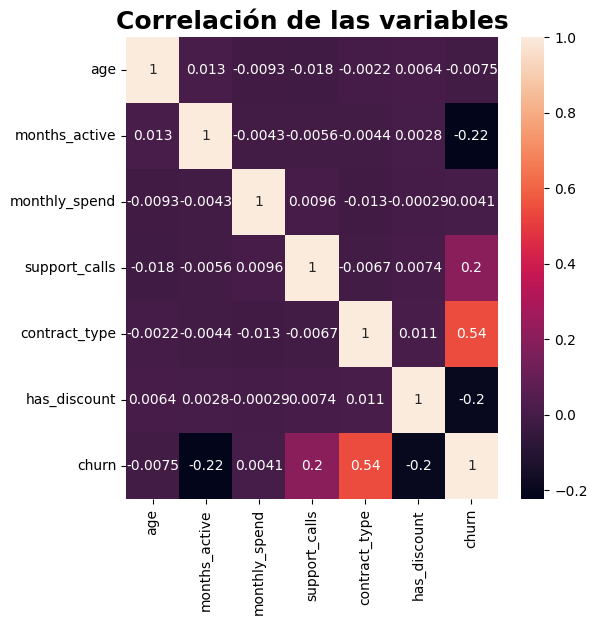

In [ ]:
# Hacemos mapa de calor para ver las correlaciones de las columnas
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

In [ ]:
# Vemos correlaciones solo con churn
corr_matrix = df[df.describe().columns].corr()
corr_matrix["churn"].sort_values(ascending=False)

,churn
churn,1.000000
contract_type,0.543264
support_calls,0.200268
monthly_spend,0.004057
age,-0.007458
has_discount,-0.199226
months_active,-0.223644


In [ ]:
# Eliminamos las columans que tienen un impacto menor para obtener mayor precicion
df = df.drop(columns=['age', 'monthly_spend'])
df.head()

,months_active,support_calls,contract_type,has_discount,churn
0,15,2,0.543795,1,0
1,57,4,0.019603,0,0
2,58,1,0.019603,1,0
3,35,4,0.543795,1,1
4,24,4,0.543795,1,1


In [ ]:
# Separar variables predictoras y objetivo
X = df.drop("churn", axis=1)
y = df["churn"]


In [ ]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Modelos a evaluar
modelos = {
    "Regresión Logística": LogisticRegression(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [ ]:
# Entrenar y mostrar resultados en tablas
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=["Real 0", "Real 1"], columns=["Predicho 0", "Predicho 1"])

    print(f"\n📌 {nombre} - Matriz de Confusión")
    display(cm_df)

    # Reporte de clasificación
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()

    print(f"📊 {nombre} - Métricas de Clasificación")
    display(report_df)


📌 Regresión Logística - Matriz de Confusión


,Predicho 0,Predicho 1
Real 0,2613,436
Real 1,382,1069


📊 Regresión Logística - Métricas de Clasificación


,precision,recall,f1-score,support
0,0.872454,0.857002,0.864659,3049.000000
1,0.710299,0.736733,0.723275,1451.000000
accuracy,0.818222,0.818222,0.818222,0.818222
macro avg,0.791377,0.796868,0.793967,4500.000000
weighted avg,0.820168,0.818222,0.819071,4500.000000



📌 Árbol de Decisión - Matriz de Confusión


,Predicho 0,Predicho 1
Real 0,2714,335
Real 1,343,1108


📊 Árbol de Decisión - Métricas de Clasificación


,precision,recall,f1-score,support
0,0.887798,0.890128,0.888962,3049.000000
1,0.767845,0.763611,0.765722,1451.000000
accuracy,0.849333,0.849333,0.849333,0.849333
macro avg,0.827822,0.826870,0.827342,4500.000000
weighted avg,0.849120,0.849333,0.849224,4500.000000



📌 Random Forest - Matriz de Confusión


,Predicho 0,Predicho 1
Real 0,2692,357
Real 1,316,1135


📊 Random Forest - Métricas de Clasificación


,precision,recall,f1-score,support
0,0.894947,0.882912,0.888889,3049.000000
1,0.760724,0.782219,0.771322,1451.000000
accuracy,0.850444,0.850444,0.850444,0.850444
macro avg,0.827835,0.832566,0.830105,4500.000000
weighted avg,0.851667,0.850444,0.850980,4500.000000



📌 Naive Bayes - Matriz de Confusión


,Predicho 0,Predicho 1
Real 0,2322,727
Real 1,41,1410


📊 Naive Bayes - Métricas de Clasificación


,precision,recall,f1-score,support
0,0.982649,0.761561,0.858093,3049.000000
1,0.659803,0.971744,0.785953,1451.000000
accuracy,0.829333,0.829333,0.829333,0.829333
macro avg,0.821226,0.866652,0.822023,4500.000000
weighted avg,0.878549,0.829333,0.834832,4500.000000


<Figure size 800x600 with 0 Axes>

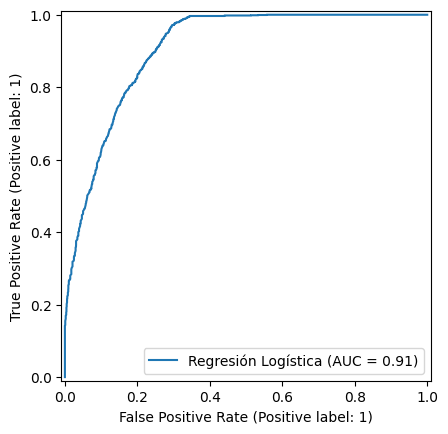

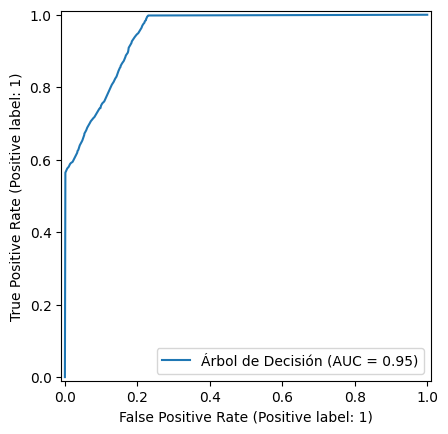

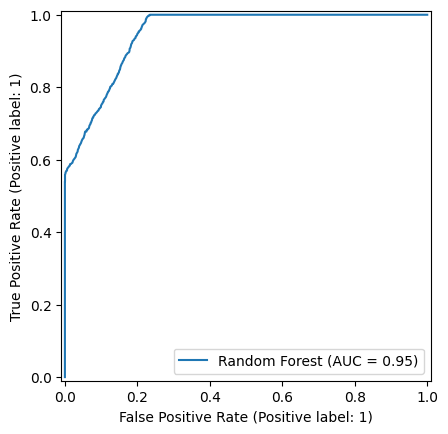

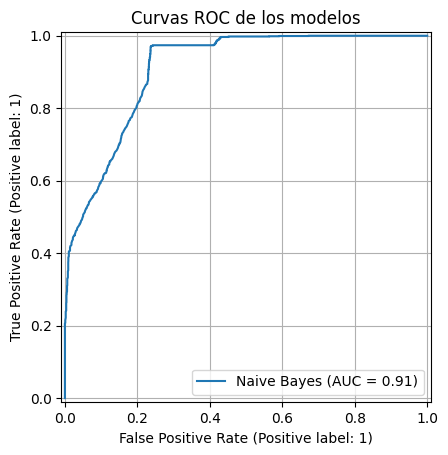

In [ ]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8, 6))
for nombre, modelo in modelos.items():
    RocCurveDisplay.from_estimator(modelo, X_test, y_test, name=nombre)

plt.title("Curvas ROC de los modelos")
plt.grid()
plt.show()

In [ ]:
# Comparar métricas clave para churn=1 entre modelos
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    churn_metrics = report["1"]  # clase positiva
    resultados.append({
        "Modelo": nombre,
        "Precision": round(churn_metrics["precision"], 3),
        "Recall": round(churn_metrics["recall"], 3),
        "F1-score": round(churn_metrics["f1-score"], 3)
    })

# Mostrar resumen
resumen_df = pd.DataFrame(resultados)
print("📌 Comparación de modelos para clientes que abandonan (churn = 1):")
display(resumen_df)

📌 Comparación de modelos para clientes que abandonan (churn = 1):


,Modelo,Precision,Recall,F1-score
0,Regresión Logística,0.710,0.737,0.723
1,Árbol de Decisión,0.768,0.764,0.766
2,Random Forest,0.753,0.784,0.768
3,Naive Bayes,0.660,0.972,0.786


### Conclusión

De acuerdo con los resultados obtenidos, el modelo con mejor desempeño en la predicción del abandono de clientes (`churn = 1`) fue **Naive Bayes**.

Este modelo logró un *recall* de **0.972**, lo que indica que detectó correctamente el 97.2% de los clientes que efectivamente abandonaron el servicio. Aunque su *precisión* fue menor (0.660), su *F1-score* fue el más alto (**0.786**), demostrando un buen equilibrio entre identificar correctamente a los abandonos sin aumentar excesivamente los falsos positivos.

Por esta razón, **Naive Bayes es el modelo recomendado** para su uso en producción si el objetivo principal es **minimizar la pérdida de clientes**, permitiendo aplicar acciones de retención a tiempo.

A pesar de que Random Forest mostró un buen rendimiento general, no es el modelo más adecuado en este caso, ya que no logra identificar con la misma eficacia a los clientes que abandonan el servicio. Dado que el objetivo principal es anticipar el churn para aplicar medidas preventivas, resulta más conveniente optar por un modelo que privilegie la detección de estos casos, aunque implique una leve pérdida en precisión. Por ello, se descarta Random Forest como la mejor opción.

Se recomienda su uso en producción para anticipar deserciones y aplicar estrategias de retención proactivas como descuentos o mejoras de servicio.
